(2, 211)


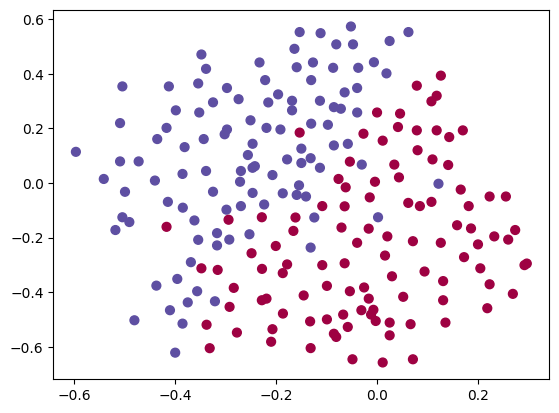

In [2]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T
print(train_X.shape)
plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

# Design a neural network w/o regularization

In [3]:
from keras import models
from keras import layers
from keras import optimizers

model_noreg = models.Sequential()
model_noreg.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model_noreg.add(layers.Dense(32, activation='relu'))
model_noreg.add(layers.Dense(64, activation='relu'))
model_noreg.add(layers.Dense(128, activation='sigmoid'))
model_noreg.add(layers.Dense(256, activation='sigmoid'))
model_noreg.add(layers.Dense(1, activation='sigmoid'))

model_noreg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_noreg.fit(train_X.T, train_y.T, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5118
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.4692
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.4929
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5355
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5308
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7156
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.7536
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.8009
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.8104
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8294
Epoch 11/1000
7/7 [

# Draw decision boundaries w/o regularization

9600/9600 [==============================] - 4s 449us/step


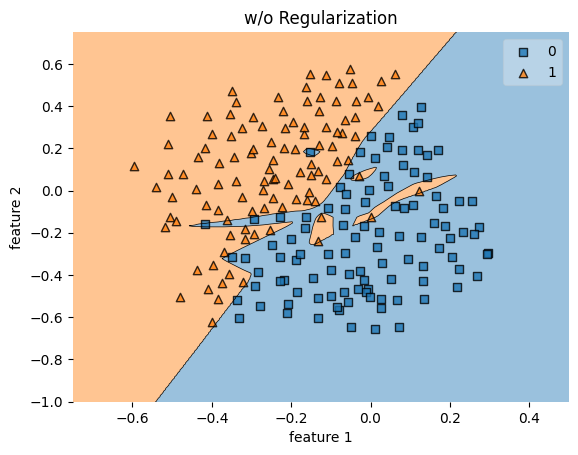

In [4]:
from mlxtend.plotting import plot_decision_regions as pdr
 
pdr(train_X.T, train_y.T.flatten(), clf = model_noreg)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('w/o Regularization')
plt.xlim(-0.75, 0.5)
plt.ylim(-1, 0.75)  
plt.show()

# Design a neural network w/ regularization

In [16]:
from tensorflow.keras import regularizers

model_L2 = models.Sequential()
model_L2.add(layers.Dense(16, activation='relu', input_shape=(2,),kernel_regularizer=regularizers.l2(l=0.0002)))
model_L2.add(layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(l=0.0002)))
model_L2.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l=0.0002)))
model_L2.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(l=0.0002)))
model_L2.add(layers.Dense(256, activation='sigmoid',kernel_regularizer=regularizers.l2(l=0.0002)))
model_L2.add(layers.Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(l=0.0002)))

model_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_L2.fit(train_X.T, train_y.T, epochs=1000)


Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7605 - accuracy: 0.5213
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7945 - accuracy: 0.4976
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.5024
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.5024
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7419 - accuracy: 0.5403
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7361 - accuracy: 0.5355
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.5924
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.7773
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.8057
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.8578
Epoch 11/1000
7/7 [

In [20]:
model_Dropout = models.Sequential()
model_Dropout.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model_Dropout.add(layers.Dropout(0.1))
model_Dropout.add(layers.Dense(32, activation='relu'))
model_Dropout.add(layers.Dropout(0.1))
model_Dropout.add(layers.Dense(64, activation='relu'))
model_Dropout.add(layers.Dropout(0.1))
model_Dropout.add(layers.Dense(128, activation='sigmoid'))
model_Dropout.add(layers.Dropout(0.1))
model_Dropout.add(layers.Dense(256, activation='sigmoid'))
model_Dropout.add(layers.Dropout(0.1))
model_Dropout.add(layers.Dense(1, activation='sigmoid'))
model_Dropout.add(layers.Dropout(0.1))

model_Dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_Dropout.fit(train_X.T, train_y.T, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.4202 - accuracy: 0.4408
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.7387 - accuracy: 0.4739
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 1.4472 - accuracy: 0.4976
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.5829 - accuracy: 0.5213
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 1.3565 - accuracy: 0.5213
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.3611 - accuracy: 0.5213
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.3465 - accuracy: 0.5498
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.2577 - accuracy: 0.6114
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.4436 - accuracy: 0.6019
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.6098 - accuracy: 0.7299
Epoch 11/1000
7/7 [

# Draw decision boundaries w/ regularization

32813/32813 [==============================] - 14s 434us/step


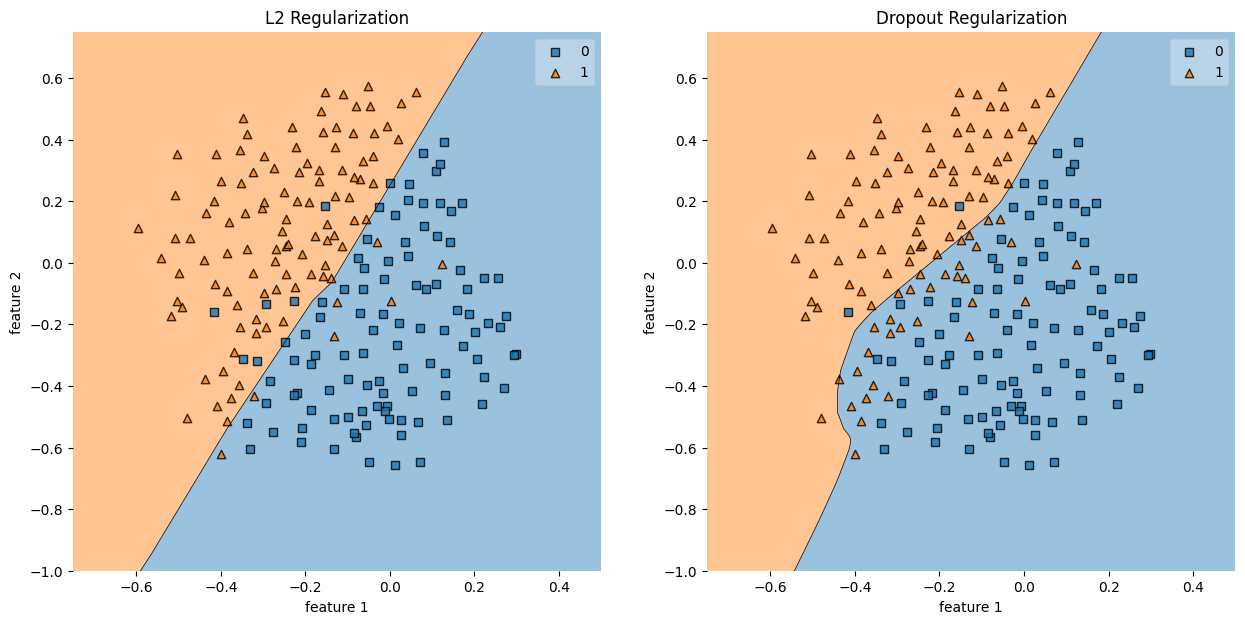

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

fig=pdr(train_X.T, train_y.T.flatten(), clf = model_L2,ax=ax1)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('L2 Regularization')
ax1.set_xlim(-0.75, 0.5)
ax1.set_ylim(-1, 0.75)

fig=pdr(train_X.T, train_y.T.flatten(), clf = model_Dropout,ax=ax2)
ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('Dropout Regularization')
ax2.set_xlim(-0.75, 0.5)
ax2.set_ylim(-1, 0.75)
plt.show()

# Compare the accuracy between the models on the test dataset

In [21]:
import numpy as np
test_X = np.asarray(test_X)
test_y = np.asarray(test_y)

accuracy_model_noreg = model_noreg.evaluate(test_X.T,test_y.T)
print(accuracy_model_noreg)

accuracy_model_L2 =  model_L2.evaluate(test_X.T, test_y.T)
print(accuracy_model_L2)

accuracy_model_Dropout = model_Dropout.evaluate(test_X.T, test_y.T)
print(accuracy_model_Dropout)


7/7 [==============================] - 0s 1ms/step - loss: 1.0780 - accuracy: 0.9300
[1.0779993534088135, 0.9300000071525574]
7/7 [==============================] - 0s 836us/step - loss: 0.4268 - accuracy: 0.9400
[0.4267699420452118, 0.9399999976158142]
7/7 [==============================] - 0s 884us/step - loss: 0.2375 - accuracy: 0.9400
[0.23754987120628357, 0.9399999976158142]
